In [11]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
import pandas as pd
import os
from keras.utils import plot_model
import matplotlib.pyplot as plt
import seaborn as sns

%run data_preproc.ipynb
%matplotlib inline

(2, 24, 1) (2, 1)


### Prepare data

In [3]:
input_dir = './data'
input_files = [f for f in os.listdir(input_dir) if '.xlsx' in f]
input_files

['201711010800.xlsx',
 '201801010800.xlsx',
 '201802010800.xlsx',
 '201712010800.xlsx']

In [12]:
data = PreProc(input_dir, '蒸気')
data.input_dir
data.set_train_test_files('201801010800.xlsx', '201802010800.xlsx')
df=data.get_df(data.train_file)

y_train = data.strip(data.get_target(data.train_file, '需要蒸気'))
y_test = data.strip(data.get_target(data.test_file, '需要蒸気'))

### Network design

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 140, 32)           192       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 46, 32)            0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 42, 32)            5152      
_________________________________________________________________
gru_3 (GRU)                  (None, 32)                6240      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 11,617
Trainable params: 11,617
Non-trainable params: 0
_________________________________________________________________


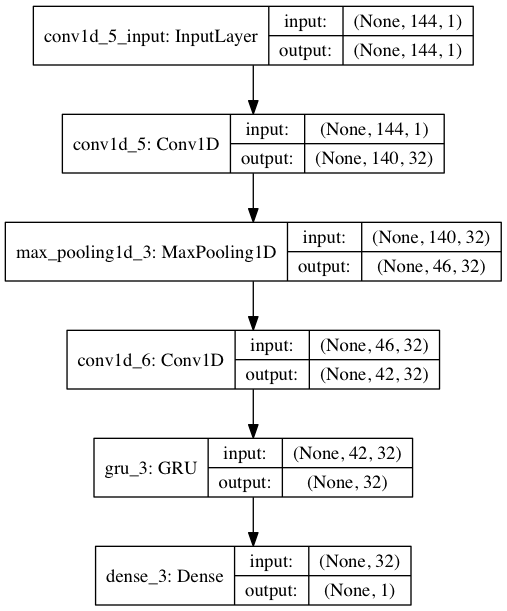

In [7]:
len_x = 144
batch_size = 32

model=Sequential()
model.add(layers.Conv1D(32, 5, activation='relu', input_shape=(len_x, 1)))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.GRU(32, dropout=0.1, recurrent_dropout=0.5))
model.add(layers.Dense(1))

model.summary()

plot_model(model, show_shapes=True, to_file='1d_conv_rnn.png')

from IPython.display import Image
Image("1d_conv_rnn.png")

### Training

In [10]:
steps = (len(y_train) - len_x) // batch_size

model.compile(optimizer=RMSprop(), loss='mae', metrics=['acc'])
history = model.fit_generator(generator=data.generator_1d(y_train, len_x, batch_size),
                              steps_per_epoch=steps, shuffle=False, verbose=1,
                              epochs=200)

Epoch 1/200
18/18 [==============================] - 2s 117ms/step - loss: 5.2621 - acc: 0.0000e+00
Epoch 2/200
18/18 [==============================] - 1s 42ms/step - loss: 1.9625 - acc: 0.0000e+00
Epoch 3/200
18/18 [==============================] - 1s 44ms/step - loss: 2.1922 - acc: 0.0000e+00
Epoch 4/200
18/18 [==============================] - 1s 44ms/step - loss: 1.5355 - acc: 0.0000e+00
Epoch 5/200
18/18 [==============================] - 1s 56ms/step - loss: 1.4283 - acc: 0.0000e+00
Epoch 6/200
18/18 [==============================] - 1s 44ms/step - loss: 1.5036 - acc: 0.0000e+00
Epoch 7/200
18/18 [==============================] - 1s 43ms/step - loss: 1.8830 - acc: 0.0000e+00
Epoch 8/200
18/18 [==============================] - 1s 42ms/step - loss: 1.9066 - acc: 0.0000e+00
Epoch 9/200
18/18 [==============================] - 1s 47ms/step - loss: 1.9174 - acc: 0.0000e+00
Epoch 10/200
18/18 [==============================] - 1s 46ms/step - loss: 2.1661 - acc: 0.0000e+00
Epoch 11

18/18 [==============================] - 1s 42ms/step - loss: 1.2226 - acc: 0.0000e+00
Epoch 84/200
18/18 [==============================] - 1s 40ms/step - loss: 1.3538 - acc: 0.0000e+00
Epoch 85/200
18/18 [==============================] - 1s 39ms/step - loss: 2.0501 - acc: 0.0000e+00
Epoch 86/200
18/18 [==============================] - 1s 41ms/step - loss: 1.8182 - acc: 0.0000e+00
Epoch 87/200
18/18 [==============================] - 1s 43ms/step - loss: 1.4711 - acc: 0.0000e+00
Epoch 88/200
18/18 [==============================] - 1s 42ms/step - loss: 1.8970 - acc: 0.0000e+00
Epoch 89/200
18/18 [==============================] - 1s 42ms/step - loss: 2.9060 - acc: 0.0000e+00
Epoch 90/200
18/18 [==============================] - 1s 42ms/step - loss: 3.2621 - acc: 0.0000e+00
Epoch 91/200
18/18 [==============================] - 1s 43ms/step - loss: 1.0798 - acc: 0.0000e+00
Epoch 92/200
18/18 [==============================] - 1s 42ms/step - loss: 0.6472 - acc: 0.0035
Epoch 93/200
18/1

18/18 [==============================] - 1s 41ms/step - loss: 1.5324 - acc: 0.0000e+00
Epoch 166/200
18/18 [==============================] - 1s 42ms/step - loss: 1.5323 - acc: 0.0000e+00
Epoch 167/200
18/18 [==============================] - 1s 41ms/step - loss: 1.5388 - acc: 0.0000e+00
Epoch 168/200
18/18 [==============================] - 1s 42ms/step - loss: 1.8955 - acc: 0.0000e+00
Epoch 169/200
18/18 [==============================] - 1s 42ms/step - loss: 1.7546 - acc: 0.0000e+00
Epoch 170/200
18/18 [==============================] - 1s 42ms/step - loss: 1.8811 - acc: 0.0000e+00
Epoch 171/200
18/18 [==============================] - 1s 42ms/step - loss: 1.2696 - acc: 0.0000e+00
Epoch 172/200
18/18 [==============================] - 1s 43ms/step - loss: 1.1256 - acc: 0.0000e+00
Epoch 173/200
18/18 [==============================] - 1s 40ms/step - loss: 1.2207 - acc: 0.0069
Epoch 174/200
18/18 [==============================] - 1s 42ms/step - loss: 1.3140 - acc: 0.0104
Epoch 175/20

### Predicting

In [13]:
steps = (len(y_test) - len_x) // batch_size

preds = model.predict_generator(generator=data.generator_1d(y_test, len_x, batch_size), steps=steps)

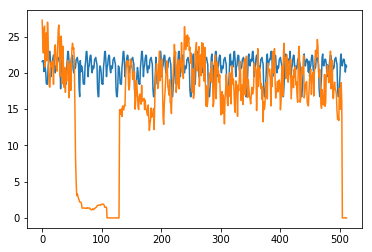

In [14]:
plt.plot(preds)
plt.plot(y_test[-512:])